In [144]:
import pandas as pd

In [145]:
headerlist = ["age of the patient", "spectacle prescription", "astigmatic", "tear production rate", "decision_class"]

df = pd.read_fwf('C:\\Users\\stoer\\Downloads\\lenses\\lenses.data', names=headerlist,  delim_whitespace=True)

In [169]:
df["decision_class"].value_counts()

3    15
2     5
1     4
Name: decision_class, dtype: int64

In [147]:
df['age of the patient'].replace({1: 'young'}, inplace=True)
df['age of the patient'].replace({2: 'adult'}, inplace=True)
df['age of the patient'].replace({3: 'old'}, inplace=True)

In [148]:
df['spectacle prescription'].replace({1: 'myope'}, inplace=True)
df['spectacle prescription'].replace({2: 'hypermetrope'}, inplace=True)

In [149]:
df['tear production rate'].replace({1: 'reduced'}, inplace=True)
df['tear production rate'].replace({2: 'normal'}, inplace=True)

In [150]:
df['astigmatic'].replace({1: 'no'}, inplace=True)
df['astigmatic'].replace({2: 'yes'}, inplace=True)

In [151]:
df = pd.get_dummies(df, columns=['age of the patient'], prefix='age of the patient')

In [152]:
df = pd.get_dummies(df, columns=['spectacle prescription'], prefix='spectacle prescription')

In [153]:
df = pd.get_dummies(df, columns=['tear production rate'], prefix='tear production rate')

In [154]:
df = pd.get_dummies(df, columns=['astigmatic'], prefix='astigmatic')

In [155]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

In [156]:
X = df.drop('decision_class', axis=1)
y = df['decision_class']

In [157]:
X.columns

Index(['age of the patient_adult', 'age of the patient_old',
       'age of the patient_young', 'spectacle prescription_hypermetrope',
       'spectacle prescription_myope', 'tear production rate_normal',
       'tear production rate_reduced', 'astigmatic_no', 'astigmatic_yes'],
      dtype='object')

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, shuffle=True) 

In [159]:
error = []
for k in range (1, 10):
    knn = KNeighborsClassifier(n_neighbors=k, metric='hamming')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_value = 1 - accuracy_score(y_test, y_pred)
    error.append(error_value)


In [160]:
import matplotlib.pyplot as plt

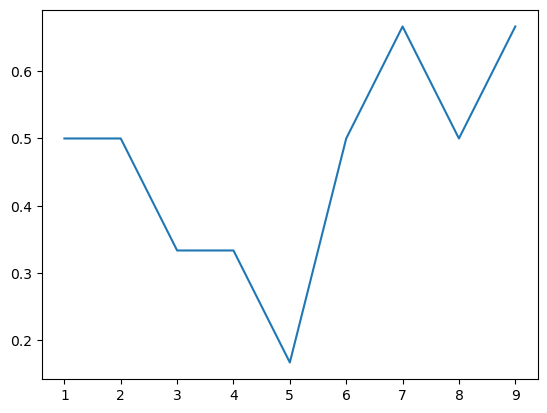

In [161]:
plt.plot(range(1, 10), error)

In [162]:
knn = KNeighborsClassifier(n_neighbors=5, metric='hamming')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='hamming')

In [163]:
y_pred = knn.predict(X_test)

In [164]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

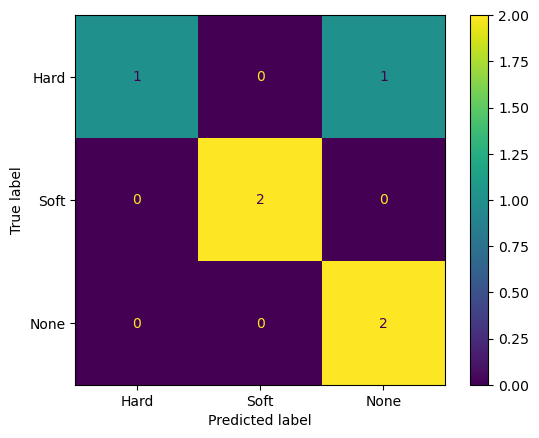

In [165]:
result=confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=["Hard", "Soft", "None"])
disp.plot()

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.89      0.83      0.82         6
weighted avg       0.89      0.83      0.82         6



want to make a meshgrid graphic

In [167]:
import numpy as np
import seaborn as sns

In [168]:

# Select two one-hot encoded features for visualization
feature1 = X_train[:, 1]  # Replace with the index of the first feature you want to use
feature2 = X_train[:, 2]  # Replace with the index of the second feature you want to use

# Create a meshgrid of points for the two selected features
x_min, x_max = feature1.min() - 1, feature1.max() + 1
y_min, y_max = feature2.min() - 1, feature2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Use the trained classifier to predict the class labels for points in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions to match the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Plot the meshgrid and decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(feature1, feature2, c=y_train, cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundaries')
plt.show()

InvalidIndexError: (slice(None, None, None), 1)

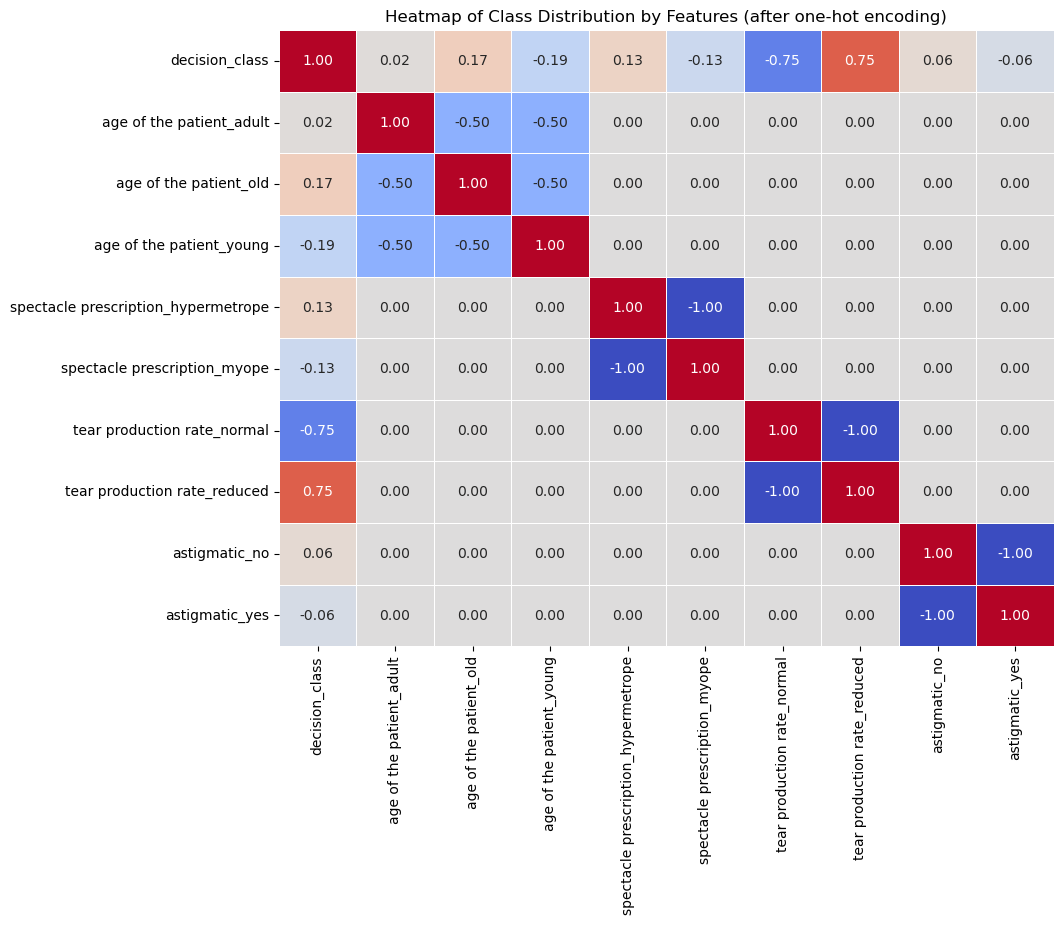

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr('spearman'), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=False)

# Set the title and labels for the axes
plt.title('Heatmap of Class Distribution by Features (after one-hot encoding)')
plt.show()